# HOMEWORK 10

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


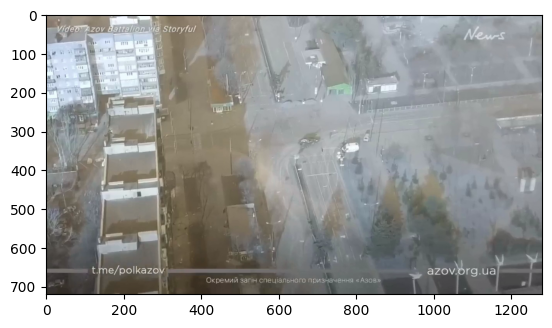

In [15]:
cap = cv2.VideoCapture('videomoving.mp4')

# take first frame of the video
ret,frame = cap.read()

plt.imshow(frame)

# Get the height and width of the frame (required to be an interger)
width = int(cap.get(3)) 
height = int(cap.get(4))

# Define the codec and create VideoWriter object. The output is stored in '*.avi' file.
out = cv2.VideoWriter('tank_mean_shift.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (width, height))

# setup initial location of window
r,h,c,w = 300,60,650,60  # simply hardcoded the values
track_window = (c,r,w,h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret, frame = cap.read() 

    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        # Draw it on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), (255,255,255),2)
        out.write(img2)
        

    else:
        break

cap.release()
out.release()

In [21]:
def create_tracker(tracker_type):
    if tracker_type == 'MIL':
        return cv2.TrackerMIL_create()
    elif tracker_type == 'KCF':
        return cv2.TrackerKCF_create()
    elif tracker_type == 'CSRT':
        return cv2.TrackerCSRT_create()
    else:
        raise ValueError("Incorrect tracker type")

cap = cv2.VideoCapture('videomoving.mp4')  # Replace with your video file path

tracker_type = 'KCF'

# Example initial bounding boxes for objects (x, y, w, h)
initial_bboxes = [(300,60,650,60)]  # Replace with your bounding boxes

trackers = []
ret, frame = cap.read()

for bbox in initial_bboxes:
    tracker = create_tracker(tracker_type)
    tracker.init(frame, bbox)
    trackers.append(tracker)

out = cv2.VideoWriter('tank_kcf_shift.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    for tracker in trackers:
        success, bbox = tracker.update(frame)
        print(success, bbox)
        x, y, w, h = map(int, bbox)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        out.write(img2)

    cv2.imshow('Frame', frame)

    if cv2.waitKey(30) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()



True (300, 60, 650, 60)
True (294, 60, 650, 60)
True (290, 60, 650, 60)
True (284, 60, 650, 60)
True (280, 60, 650, 60)
True (278, 60, 650, 60)
True (280, 60, 650, 60)
True (278, 60, 650, 60)
True (280, 58, 650, 60)
True (280, 58, 650, 60)
True (280, 58, 650, 60)
True (280, 56, 650, 60)
True (282, 54, 650, 60)
True (284, 50, 650, 60)
True (284, 46, 650, 60)
True (286, 42, 650, 60)
True (288, 38, 650, 60)
True (288, 34, 650, 60)
True (288, 30, 650, 60)
True (290, 26, 650, 60)
True (292, 22, 650, 60)
True (290, 18, 650, 60)
True (292, 16, 650, 60)
True (290, 14, 650, 60)
True (292, 12, 650, 60)
True (290, 10, 650, 60)
True (292, 8, 650, 60)
True (292, 6, 650, 60)
True (292, 4, 650, 60)
True (294, 2, 650, 60)
True (296, 2, 650, 60)
True (294, 2, 650, 60)
True (298, 2, 650, 60)
True (298, 2, 650, 60)
True (298, 2, 650, 60)
True (300, 2, 650, 60)
True (298, 2, 650, 60)
True (302, 2, 650, 60)
True (302, 2, 650, 60)
True (302, 2, 650, 60)
True (304, 2, 650, 60)
True (302, 2, 650, 60)
True (30